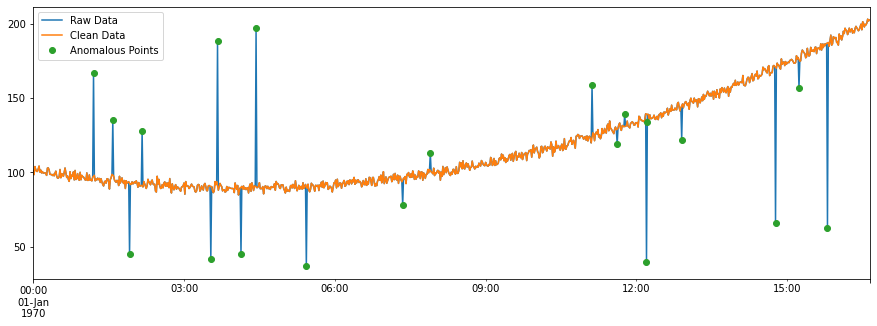

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(12345)

# Define index
nx = 1000
index = pd.date_range(start="1970", periods=nx, freq="1T")

# Define signal and noise
x = np.linspace(0, 10, nx)
signal =  2*x**2- 10* x + 2
noise = np.random.normal(loc=100, size=nx, scale=2)
y = noise + signal

# Add anomalies
anom_num = rng.integers(low=0, high=200, size=20)
anom_ids = rng.integers(low=0, high=nx, size=20)
y[anom_ids] = anom_num
is_anom = [item in anom_ids for item in range(nx)]

# Pandas DataFrame and plot
raw_data = pd.Series(y, index = index)
clean_data = raw_data[np.invert(is_anom)]
raw_data.plot(figsize=(15,5))
clean_data.plot()
raw_data[anom_ids].plot(style='o')
plt.legend(['Raw Data', 'Clean Data','Anomalous Points'])
plt.savefig('Toy_data_set.png', bbox_inches='tight', dpi=1000)
#plt.autoscale()
plt.rcParams.update({'font.size': 22})

In [138]:
def my_detect(x,y):
    poly_order = 1
    coefs = np.polyfit(x, y, poly_order)
    y_pred = np.polyval(coefs, x)
    n= len(x)
    p=2
    dof = n-p-1
    
    X_mat = np.vstack((np.ones_like(x), x)).T
    X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
    hat_diagonal = X_hat.diagonal()
    
    res = y - y_pred
    print(res)
    sse = np.sum(res ** 2)
    t_res = res* np.sqrt(dof / (sse * (1 - hat_diagonal) - res**2))
    
    return t_res

import math
def internally_studentized_residual(X,Y):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    beta1 = np.dot((X - mean_X), (Y - mean_Y)) / diff_mean_sqr
    beta0 = mean_Y - beta1 * mean_X
    y_hat = beta0 + beta1 * X
    residuals = Y - y_hat
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    #print(h_ii)
    Var_e = math.sqrt(sum((Y - y_hat) ** 2)/(n-2))
    SE_regression = Var_e*((1-h_ii) ** 0.5)
    studentized_residuals = residuals/SE_regression
    return studentized_residuals

def deleted_studentized_residual(X,Y):
    #formula from https://newonlinecourses.science.psu.edu/stat501/node/401/
    r = internally_studentized_residual(X,Y)
    n = len(r)
    return [r_i*math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r]
    

In [139]:
x = [1,2,3,10]
y = [2.1,3.8,5.2,2.1]

my_detect(x,y)

[-1.59  0.24  1.77 -0.42]


array([ -1.74310044,   0.12165278,   1.63605098, -19.79898987])

In [140]:
deleted_studentized_residual(x,y)

[-1.743100437343583,
 0.12165277955897558,
 1.636050983921815,
 -19.798989873225622]

In [2]:
# Transform variables to lists
x = (np.array(raw_data.index, dtype=np.int64) - raw_data.index[0].value) / 1e9
y = raw_data.to_numpy()

# Create a polynomial fit and apply the fit to data
poly_order = 2
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)

In [3]:
# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

In [8]:
X_mat

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 6.000e+01],
       [1.000e+00, 1.200e+02],
       ...,
       [1.000e+00, 5.982e+04],
       [1.000e+00, 5.988e+04],
       [1.000e+00, 5.994e+04]])

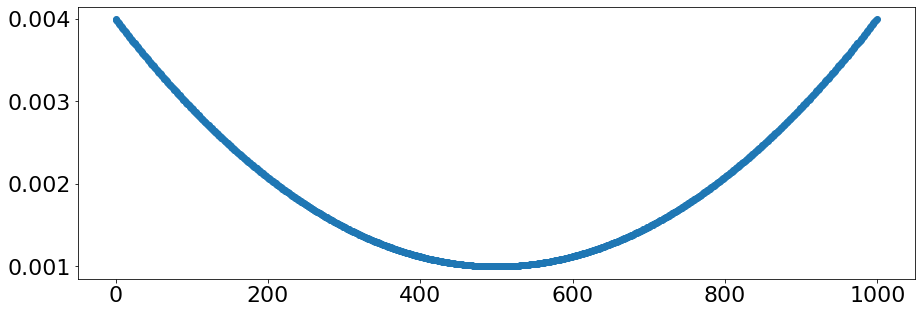

In [7]:
plt.figure(figsize=(15,5))
plt.plot(hat_diagonal, '-o')

In [21]:
x = [1,1,2,3,10,11]
# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

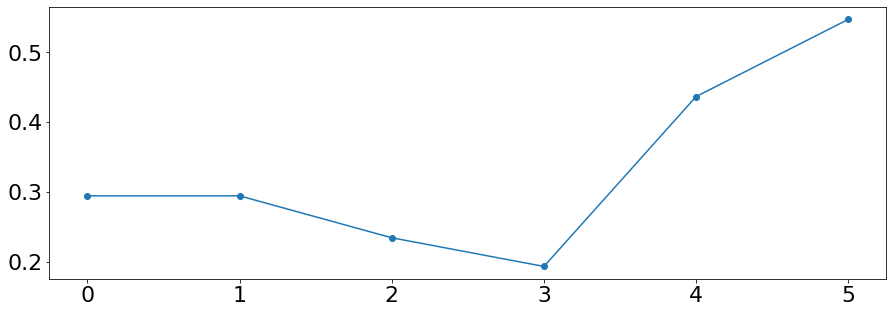

In [22]:
plt.figure(figsize=(15,5))
plt.plot(hat_diagonal, '-o')

In [94]:
x = [1,2,3,10]
y = [2.1,3.8,5.2,2.1]

X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

from scipy.stats import t as student_dist

# Calculate degrees of freedom
n = len(y)
dof = n - 3  # Using p = 2 from paper

# Create a polynomial fit and apply the fit to data
poly_order = 1
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)

# Calculate standardised residuals 
res = y - y_pred
sse = np.sum(res ** 2)
t_res = res * np.sqrt(dof / (sse * (1 - hat_diagonal) - res))

In [77]:
res

array([-1.59,  0.24,  1.77, -0.42])

In [86]:
x = [1,2,3,10]
y = [2.1,3.8,5.2,2.101]

X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

from scipy.stats import t as student_dist

# Calculate degrees of freedom
n = len(y)
dof = n - 3  # Using p = 2 from paper

# Create a polynomial fit and apply the fit to data
store=[]
for item in range(len(x)):
    
    x_tmp = list(set(x)-set([x[item]]))
    y_tmp = list(set(y)-set([y[item]]))
    poly_order = 1
    coefs = np.polyfit(x_tmp, y_tmp, poly_order)
    y_pred_i = np.polyval(coefs, x[item])
    d_i = y[item]-y_pred_i
    mse_i = np.sum((y_tmp - np.polyval(coefs, x_tmp))**2)
    h_ii = hat_diagonal[item]
    store.append(y_pred[item]/np.sqrt(mse_i*(1-h_ii)))



In [92]:
import math
def internally_studentized_residual(X,Y):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    beta1 = np.dot((X - mean_X), (Y - mean_Y)) / diff_mean_sqr
    beta0 = mean_Y - beta1 * mean_X
    y_hat = beta0 + beta1 * X
    residuals = Y - y_hat
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    print(h_ii)
    Var_e = math.sqrt(sum((Y - y_hat) ** 2)/(n-2))
    SE_regression = Var_e*((1-h_ii) ** 0.5)
    studentized_residuals = residuals/SE_regression
    return studentized_residuals

def deleted_studentized_residual(X,Y):
    #formula from https://newonlinecourses.science.psu.edu/stat501/node/401/
    r = internally_studentized_residual(X,Y)
    n = len(r)
    return [r_i*math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r]

In [93]:
deleted_studentized_residual(x,y)

[0.43 0.33 0.27 0.97]


[-1.7431149706809517,
 0.12165643158431381,
 1.6360377525572067,
 -19.79757565966079]

In [95]:
hat_diagonal

array([0.43, 0.33, 0.27, 0.97])

In [72]:
hat_diagonal

array([0.43, 0.33, 0.27, 0.97])

In [71]:
store/np.std(store)

array([ 0.2641807 , -0.05608295, -0.37287119,  2.19513639])

In [34]:
t_res

array([-0.71464103,  0.12460767,  1.11205347, -0.54364662])

In [27]:
y-y_pred

array([ 0.02082645, -0.0468595 ,  0.02677686, -0.0007438 ])

In [ ]:
-1.59
2	3.8	0.24	0.1217
3	5.2	1.77	1.6361
10	2.1	-0.42	-19.7990

In [ ]:
1.7431
2	3.8	0.24	0.1217
3	5.2	1.77	1.6361
10	2.1	-0.42	-19.7990

In [112]:
# Transform variables to lists
x = (np.array(raw_data.index, dtype=np.int64) - raw_data.index[0].value) / 1e9
y = raw_data.to_numpy()

# Create a polynomial fit and apply the fit to data
poly_order = 2
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)
residuals = y-y_pred
n= len(x)
dof = n - 3  # Using p = 2 from paper


# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

Var_e = math.sqrt(sum((y - y_pred) ** 2)/(n-2))
SE_regression = Var_e*((1-h_ii) ** 0.5)
t_res = residuals/SE_regression

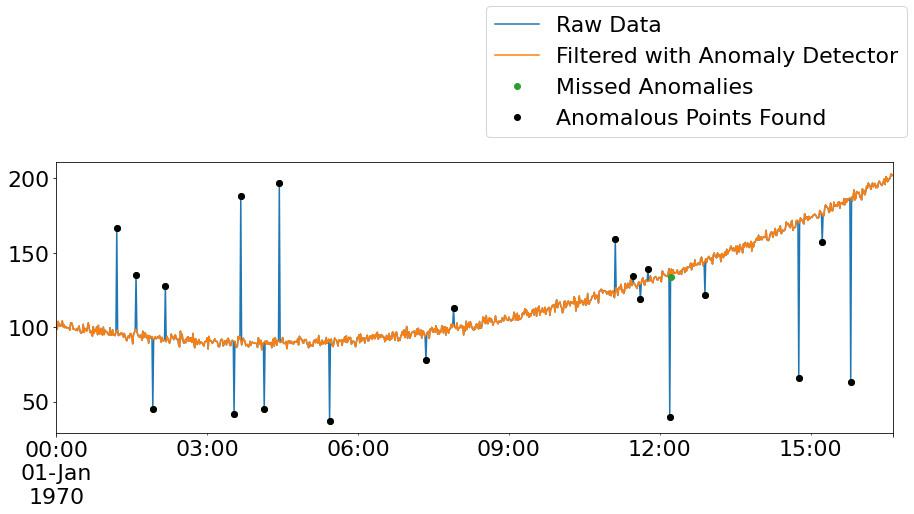

In [115]:
# Return filtered dataframe with the anomalies removed using BC value
alpha=0.05
bc_relaxation = 1
#bc_relaxation = 0.3
bc = student_dist.ppf(1 - alpha / (2 * n), df=dof) * bc_relaxation
mask = np.logical_and(t_res < bc, t_res > - bc)

# Plot anomalous and filtered data
ax=raw_data.plot(figsize=(15,5))

raw_data[mask].plot(ax=ax)
raw_data[anom_ids].plot(style='o')

raw_data[np.invert(mask)].plot(style='ok')
plt.legend(['Raw Data','Filtered with Anomaly Detector', 'Missed Anomalies', 'Anomalous Points Found'],bbox_to_anchor=(0.5, 1.05))
plt.rcParams.update({'font.size': 22})
#plt.savefig('results_1.png', bbox_inches='tight', dpi=1000)


In [108]:
bc

12732.395420777828

In [111]:
dof

1